In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as r

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [21]:
X_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')
X_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [22]:
print(X_train.shape) #number of data units, dimensional size after multiplication
print(y_train.shape) #in this case, the data images are 100px * 100px * 3 (RGB layers)
print(X_test.shape)
print(y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [23]:
#reshaping the data, using this method, we give the new length/cardinal of the set and the new dimensions
reshaped_X_train = X_train.reshape(len(X_train), 100, 100, 3)
reshaped_y_train = y_train.reshape(len(y_train), 1)
reshaped_X_test = X_test.reshape(len(X_test), 100, 100, 3)
reshaped_y_test = y_test.reshape(len(y_test), 1)

In [24]:
print(reshaped_X_train.shape)
print(reshaped_X_test.shape)
print(reshaped_y_train.shape)
print(reshaped_y_test.shape)
#that's better

(2000, 100, 100, 3)
(400, 100, 100, 3)
(2000, 1)
(400, 1)


In [25]:
#rescaling the data, we have basically 3d data, represented by a collection of lists => 
#[]:1d; [[]..[]]:2d, [[[]..[]]..[[]..[]]:3d]
#we're at the 3d one in this case, the values are essentially between 0 and 255, to rescale we divide everything by
#the maxvalue, which is 255
reshaped_X_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [26]:
reshaped_X_train = reshaped_X_train/255
reshaped_X_test = reshaped_X_test/255
reshaped_X_train[1, :]
#all values are now between 0 and 1

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

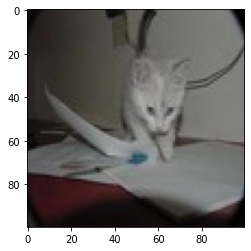

In [38]:
plt.imshow(reshaped_X_train[r.randint(0, len(reshaped_X_train))])
#loading random images

In [40]:
#Model making
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [41]:
#adding the cost fucntion? not sure what this yet means, and the propagation
#I assume adding these algorithms to construct the CNN fully
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [49]:
model.fit(reshaped_X_train, reshaped_y_train, epochs = 5, batch_size = 64)
#re-executing this line will not reset the training and will start off where it left 

Epoch 1/5
32/32 [==============================] - 6s 187ms/step - loss: 0.2462 - accuracy: 0.89954s - loss: 0.2254  - ETA: 2s - loss: 0.2357  - ETA: 0s - loss: 0.2447 - accu
Epoch 2/5
32/32 [==============================] - 9s 284ms/step - loss: 0.1869 - accuracy: 0.9315
Epoch 3/5
32/32 [==============================] - 9s 281ms/step - loss: 0.1625 - accuracy: 0.9475
Epoch 4/5
32/32 [==============================] - 9s 290ms/step - loss: 0.1296 - accuracy: 0.9555
Epoch 5/5
32/32 [==============================] - 9s 272ms/step - loss: 0.0929 - accuracy: 0.9755


In [50]:
model.evaluate(reshaped_X_test, reshaped_y_test)

13/13 [==============================] - 0s 25ms/step - loss: 0.9418 - accuracy: 0.7000


[0.9418193697929382, 0.699999988079071]

Dog


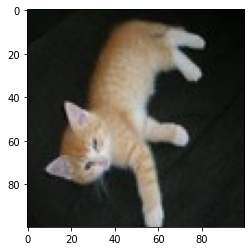

In [95]:
id = r.randint(0, len(reshaped_X_test))
sample = plt.imshow(reshaped_X_test[id])
y_pred = model.predict(reshaped_X_test[id].reshape(1, 100, 100, 3))
#print(y_pred)
label = 'Cat' if y_pred > 0.5 else 'Dog'
print(label)